# Predictive Cart Pole

Assume random actions

- Predict next state given current state
- Let me use a small network and visualize the dynamics?

https://gymnasium.farama.org/environments/classic_control/cart_pole/

- Because we have the velocity, no need to history right now, unless you wanted the network to someone learn acceleration, etc.

- https://stats.stackexchange.com/questions/49953/classification-vs-regression-for-prediction-of-the-sign-of-a-continuous-respons

- Chat GPT didn't have a choice, as it was predicting discrete next variables
- Why discretize a continous variable though?
- Proof may be in the pudding...


In [7]:
import gymnasium as gym
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch

env = gym.make('CartPole-v1')

print("Action Space: ", env.action_space)
print("Obs Space: ", env.observation_space)


SEED = 0
torch.manual_seed(SEED)


Action Space:  Discrete(2)
Obs Space:  Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [144]:
W = torch.normal(0,1,size=(6,6))

x = torch.zeros(size=(1,6)) # 4 obs, 1 reward, 1 action

params = [W]

for p in params:
    p.requires_grad = True


In [145]:
print(W)
print(x)

tensor([[-1.6115, -0.4794, -0.1434, -0.3173,  0.9671, -0.9911],
        [ 0.3016, -0.1073,  0.8629, -0.0195,  0.9910, -0.7777],
        [ 0.3140,  0.2133, -0.1201,  0.3605, -2.3217, -1.1964],
        [ 0.1970, -1.1773, -0.5596,  0.5335,  0.4069,  0.3946],
        [ 0.1715,  0.8760, -0.2871,  1.0216, -0.0744, -1.0922],
        [ 0.3920,  0.5945,  0.6623, -1.2063,  0.6074, -0.5472]],
       requires_grad=True)
tensor([[0., 0., 0., 0., 0., 0.]])


In [146]:
action = env.action_space.sample()  # agent policy that uses the observation and info

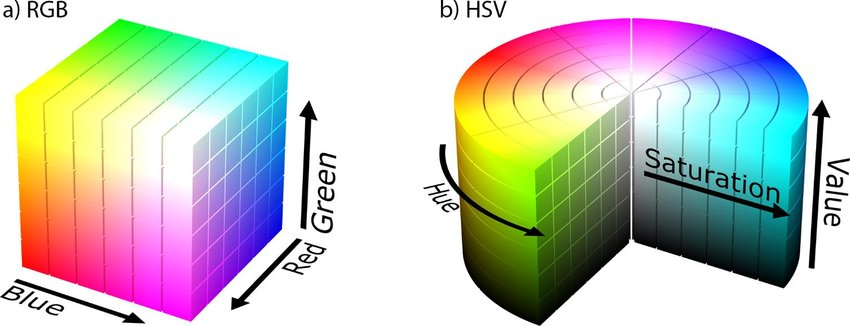

In [147]:
observation, info = env.reset(seed=SEED)
losses = []  # List to store loss values


In [162]:

for _ in range(1):

    # forward pass - make prediction
    y =  x @ W
    obs_pred = y[0,:5]
    action = round(torch.sigmoid(y[0,5]).item())
    action = env.action_space.sample()  # agent policy that uses the observation and info
    print("obs: ", obs)
    print(W[:,0])
    print(x[0,:]@W[:,0])
    print("pred: ", obs_pred)

    observation, reward, terminated, truncated, info = env.step(action)

    obs = np.append(observation,reward)
    obs = torch.tensor(obs).reshape(1,5)
    print("actual: ", obs)

    new_x = torch.zeros(size=(1,6)) 
    new_x[0:,:5] = obs
    new_x[0:,5] = torch.tensor([action], dtype=torch.float)


    #calculate prediction error
    loss = torch.abs(obs - obs_pred).mean()
    # print(f"pred {obs_pred[0]}")
    # print(f"actual {obs[0,0]}")

    #backward pass
    # W.grad = None
    # loss.backward()
    # W.data += -0.001 * W.grad

    losses.append(loss.item())
    # print(f"Loss: {loss.item()}", end="\r")

    # print(observation, reward, terminated, truncated, info)
    if terminated or truncated:
        observation, info = env.reset(seed=SEED)
        obs = np.append(observation,0)
        obs = torch.tensor(obs).reshape(1,5)
        new_x = torch.zeros(size=(1,6)) 
        new_x[0:,:5] = obs
        new_x[0:,5] = torch.tensor([action], dtype=torch.float)

    x = new_x


env.close()


obs:  tensor([[ 0.0383,  0.3736, -0.1257, -0.7808,  1.0000]], dtype=torch.float64)
tensor([-0.5481,  0.2688, -0.7665,  0.1305, -0.0047, -0.0218],
       grad_fn=<SelectBackward0>)
tensor(0.0691, grad_fn=<DotBackward0>)
pred:  tensor([ 0.0691,  0.2346, -0.1345, -0.8089,  0.9814], grad_fn=<SliceBackward0>)
actual:  tensor([[ 0.0458,  0.1805, -0.1413, -0.5301,  1.0000]], dtype=torch.float64)


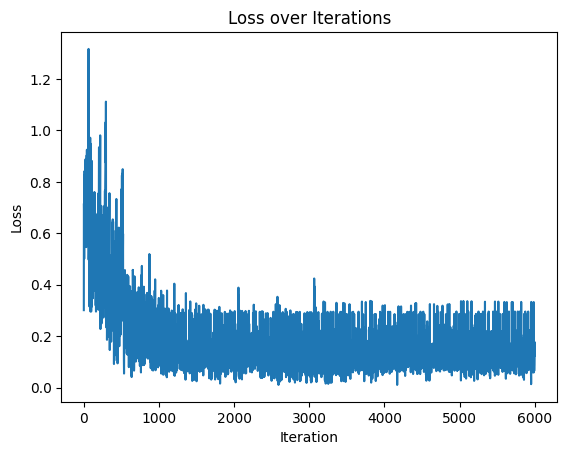

In [159]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

https://neptune.ai/blog/deep-learning-visualization
https://distill.pub/2020/circuits/visualizing-weights/
https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network
https://stackoverflow.com/questions/58676093/visualizing-neural-network-using-python

In [164]:
print(x)
print(W)
y =  x @ W
print(y)
print(W[:,0])
print(x[0,:]@W[:,0])

W_max = torch.max(torch.abs(W), axis=0)[0]
print(W_max)
W_normalized = W / W_max
print(W_normalized[:,0])

tensor([[ 0.0458,  0.1805, -0.1413, -0.5301,  1.0000,  0.0000]])
tensor([[-0.5481, -0.3453, -0.4547, -0.2525,  0.0545, -0.9911],
        [ 0.2688,  0.3982,  0.2214,  0.1653,  0.4134, -0.7777],
        [-0.7665,  0.4628,  0.2793,  0.4991, -1.6193, -1.1964],
        [ 0.1305, -0.3988,  0.1960,  1.0156,  0.4181,  0.3946],
        [-0.0047, -0.1542, -0.0117, -0.0054,  0.9478, -1.0922],
        [-0.0218,  0.0479,  0.0161, -0.2049,  0.1008, -0.5472]],
       requires_grad=True)
tensor([[ 0.0578,  0.0479, -0.1359, -0.5960,  1.0320, -1.3181]],
       grad_fn=<MmBackward0>)
tensor([-0.5481,  0.2688, -0.7665,  0.1305, -0.0047, -0.0218],
       grad_fn=<SelectBackward0>)
tensor(0.0578, grad_fn=<DotBackward0>)
tensor([0.7665, 0.4628, 0.4547, 1.0156, 1.6193, 1.1964],
       grad_fn=<MaxBackward0>)
tensor([-0.7151,  0.3507, -1.0000,  0.1703, -0.0061, -0.0284],
       grad_fn=<SelectBackward0>)


Text(0, 0.5, 'Rows')

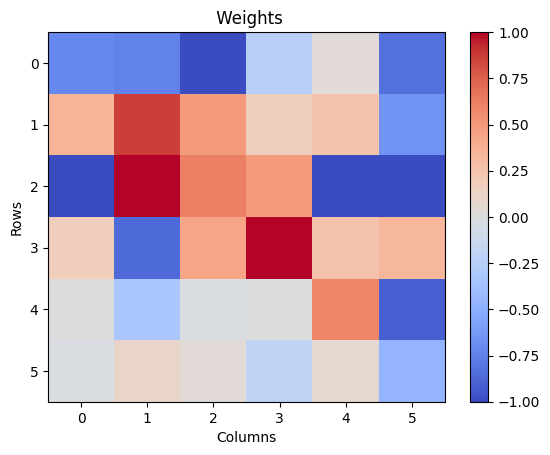

In [165]:
# plt.subplot(1, 2, 1)
plt.title(" Weights")
plt.imshow(W_normalized.detach().numpy(), cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xlabel('Columns')
plt.ylabel('Rows')

In [86]:
from torchviz import make_dot


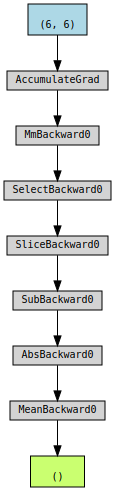

In [87]:
make_dot(loss)